In [1]:
import os 
os.chdir("../")
%pwd

'd:\\Projects\\Phishing_Detector'

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,)
from xgboost import XGBClassifier 
# from catboost import CatBoostClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("phishing_data/NetworkData.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
X = df.drop('Result',axis=1)   # independent 
y = df['Result'].replace(-1,0)  # dependent 

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    'GaussianMixture':GaussianMixture(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()

}

In [ ]:
def model_evaluation(y_test,y_pred):
    acc_score = accuracy_score(y_test,y_pred)
    conf_mat = confusion_matrix(y_test,y_pred)
    class_repo = classification_report(y_test,y_pred)
    return acc_score,conf_mat,class_repo

In [23]:
params = {
    'LogisticRegression' : {
        'penalty':['l1','l1','elasticnet'],
        'solver':['lbfgs','newton-cg','liblinear'],
        'multi_class':['auto','ovr','multinomial']
    },
    'DecisionTreeClassifier':{
        'criterion':['gini','entropy','log_loss'],
        'splitter':['best','random'],
        # 'max_depth':[3,5,7,9],
        # 'max_features':['sqrt','log2']
    },
    'SVC':{
        'C':[0.5,1,1.5,2],
        'kernel':['linear','poly','rbf','sigmoid'],
        # 'gamma':['scale','auto']

    },
    'GaussianNB':{

    },
    'GaussianMixture':{
        # 'n_components':[3,5,7,9],
        # 'covariance_type':['full','tied','diag','spherical'],
        'init_params':['kmeans','k-means++','random']

    },
    'RandomForestClassifier':{
        'n_estimators':[50,100,150,200],
        'criterion':['gini','entropy','log_loss'],

    },
    'AdaBoostClassifier':{
        'n_estimators':[50,100,150],
        'learning_rate':[0.5,1,1,5]

    },
    'GradientBoostingClassifier':{
        'loss':['log_loss', 'exponential'],
        'criterion':['friedman_mse','squared_error']

    },
    'XGBClassifier':{
        'eta':[0.1,0.3,0.5,0.7],
        'gamma':[3,5,7,11]

    }

}

In [10]:
def hyper_tuning(clf,param_grid,x_train,y_train):
    cv=GridSearchCV(clf,param_grid=param_grid,verbose = 1,cv=5)
    cv.fit(x_train,y_train)
    best_estimator = cv.best_estimator_
    best_params = cv.best_params_

    return best_estimator,best_params

```bash 
Without hyperparameter tuning 
```

In [ ]:
def model_trainer(x_train,x_test,y_train,y_test):
    accuracy = []
    model_list = []
    for name,model in models.items():
        clf = model
        clf.fit(x_train,y_train)

        y_pred = clf.predict(x_test)
        accu_score,conf_martix,_ = model_evaluation(y_test,y_pred)
        print(name)
        model_list.append(name)

        print("Model train performance")
        print("accuracy : ",accu_score)
        print("confusion matrix : ",conf_martix)

        accuracy.append(accu_score)

        print("="*35)
        print("\n")

    return accuracy,model_list, # feature_importance

        

In [12]:
accuracy,model_list = model_trainer(x_train,x_test,y_train,y_test)

LogisticRegression
Model train performance
accuracy :  0.9218523878437048
confusion matrix :  [[1069  114]
 [ 102 1479]]


DecisionTreeClassifier
Model train performance
accuracy :  0.9547756874095513
confusion matrix :  [[1118   65]
 [  60 1521]]


SVC
Model train performance
accuracy :  0.9435600578871202
confusion matrix :  [[1088   95]
 [  61 1520]]


GaussianNB
Model train performance
accuracy :  0.5824891461649783
confusion matrix :  [[1181    2]
 [1152  429]]




  File "d:\Projects\Phishing_Detector\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\Projects\Phishing_Detector\venv\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\Projects\Phishing_Detector\venv\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Projects\Phishing_Detector\venv\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


GaussianMixture
Model train performance
accuracy :  0.4280028943560058
confusion matrix :  [[1183    0]
 [1581    0]]


RandomForestClassifier
Model train performance
accuracy :  0.9670767004341534
confusion matrix :  [[1123   60]
 [  31 1550]]


AdaBoostClassifier
Model train performance
accuracy :  0.9276410998552822
confusion matrix :  [[1075  108]
 [  92 1489]]


GradientBoostingClassifier
Model train performance
accuracy :  0.9464544138929089
confusion matrix :  [[1102   81]
 [  67 1514]]


XGBClassifier
Model train performance
accuracy :  0.9688856729377714
confusion matrix :  [[1129   54]
 [  32 1549]]




In [13]:

pd.DataFrame(list(zip(model_list,accuracy)),columns=['Model_Name','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending=False)

,Model_Name,Accuracy_Score
8,XGBClassifier,0.968886
5,RandomForestClassifier,0.967077
1,DecisionTreeClassifier,0.954776
7,GradientBoostingClassifier,0.946454
2,SVC,0.943560
6,AdaBoostClassifier,0.927641
0,LogisticRegression,0.921852
3,GaussianNB,0.582489
4,GaussianMixture,0.428003


In [14]:
clf = XGBClassifier()
clf.fit(x_train,y_train)
importance = clf.feature_importances_

In [22]:
para = {
        'eta':[0.1,0.3,0.5,0.7],
        'gamma':[3,5,7,11]
    }

best_estimator,best_params = hyper_tuning(clf,param_grid=para,x_train=x_train,y_train=y_train)
print(best_estimator)
print(best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)
{'eta': 0.3, 'gamma': 3}


In [16]:
best_estimator.fit(x_train,y_train)
y_pred = best_estimator.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9551374819102749


In [17]:
indices = np.argsort(importance)[::-1]
indices

array([ 7, 13,  5, 15, 25, 27,  2, 14, 24,  6,  1, 11, 28, 19, 21, 12, 16,
        0, 10, 26, 23,  4, 22,  9,  8, 18, 20, 17, 29,  3], dtype=int64)

In [18]:
importance[indices]

array([0.38610667, 0.17480327, 0.12622339, 0.02907251, 0.02355826,
       0.01877411, 0.01606925, 0.01599344, 0.0158567 , 0.0144326 ,
       0.01418748, 0.01340072, 0.01243067, 0.01208764, 0.0112914 ,
       0.01071466, 0.01006582, 0.00935732, 0.00923568, 0.00882468,
       0.0086695 , 0.00815596, 0.00789439, 0.00787277, 0.00726056,
       0.00624543, 0.00606587, 0.00528935, 0.00520262, 0.0048573 ],
      dtype=float32)

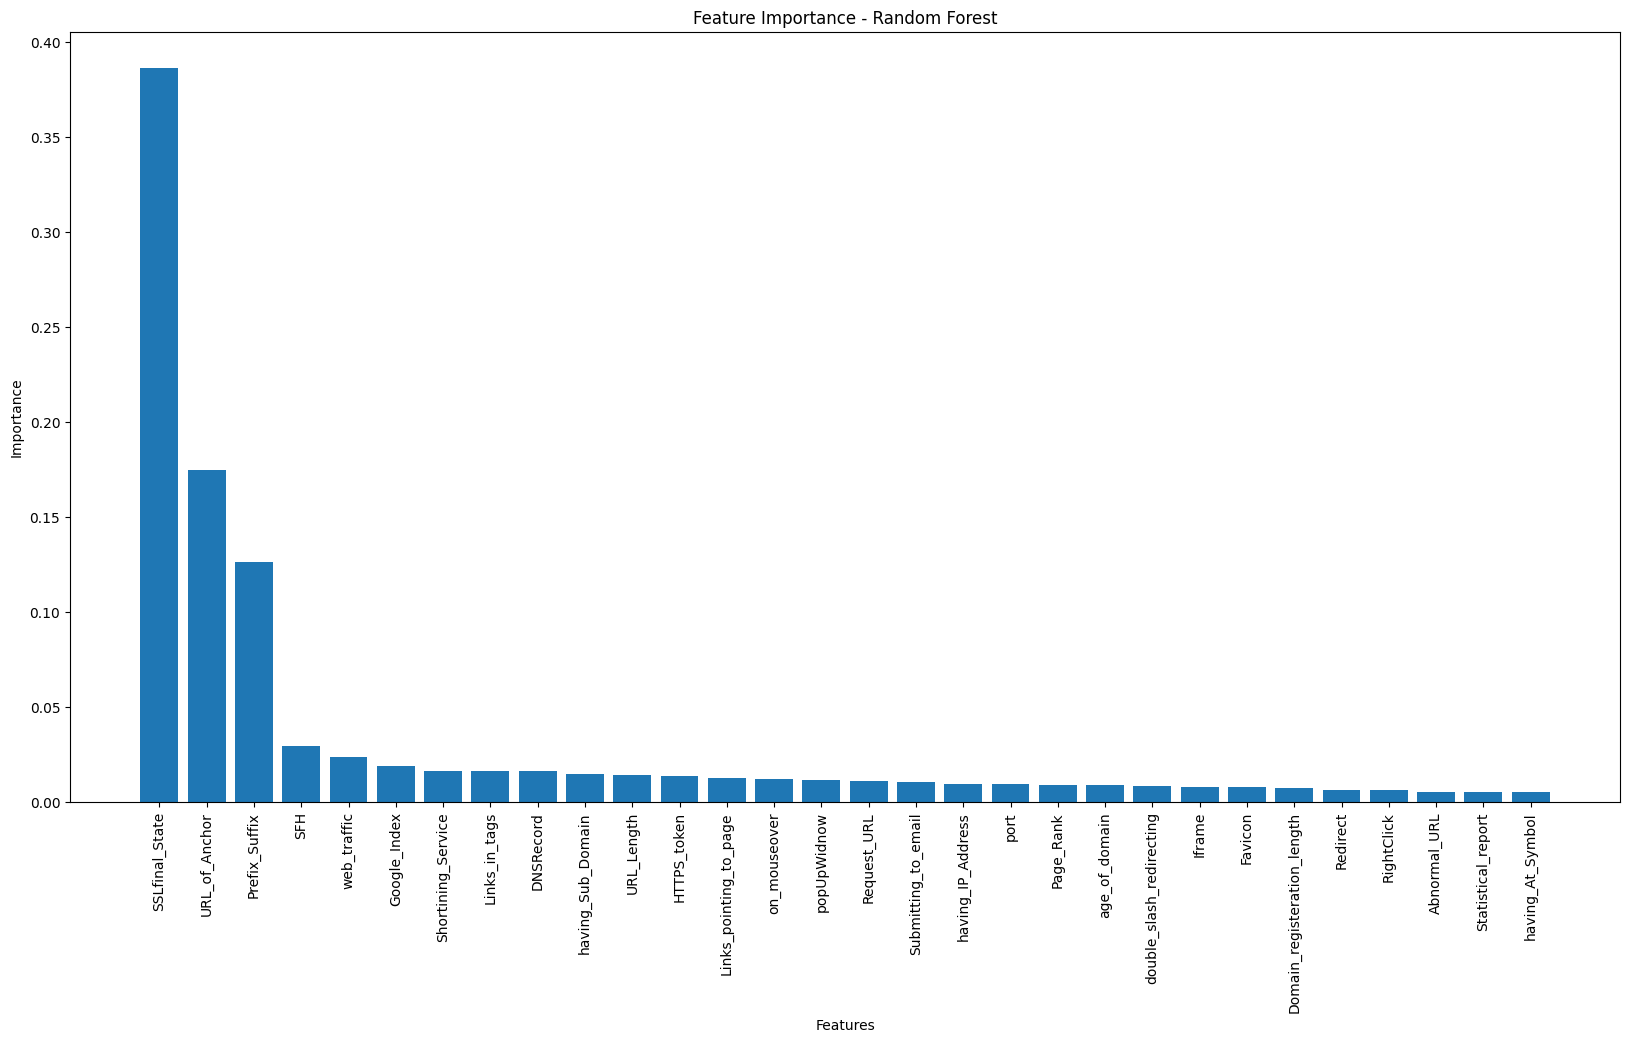

In [19]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 10))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [df.columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### From here plane of attack - 

> 1. HyperParameter Tuning 
> 2. Add some pipelines functios for handing missing values
> 3. Fetch the features from the url so that prediction can be performed  
>     - thoda sa sar dard krega ye 🤦‍♂️🤦

```bash
4.   Construct the project into Modular coding 
5.   Deployemant 

```


``` bash
With Hyperparameter tuning 

In [24]:
def model_trainer(x_train,x_test,y_train,y_test,params):
    accuracy = []
    model_list = []
    for i in range(len(list(models))):
        model = list(models.values())[i]
        param = params[list(params.keys())[i]] 
        gs = GridSearchCV(model,param,cv=3)
        gs.fit(x_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(x_train,y_train)

        y_pred = model.predict(x_test)
        accu_score,conf_martix,_ = model_evaluation(y_test,y_pred)
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print("Model train performance")
        print("accuracy : ",accu_score)
        print("confusion matrix : ",conf_martix)

        accuracy.append(accu_score)

        print("="*35)
        print("\n")

    return accuracy,model_list

        

In [25]:
accuracy,model_list = model_trainer(x_train,x_test,y_train,y_test,params)

LogisticRegression
Model train performance
accuracy :  0.9222141823444283
confusion matrix :  [[1070  113]
 [ 102 1479]]


DecisionTreeClassifier
Model train performance
accuracy :  0.9627351664254703
confusion matrix :  [[1121   62]
 [  41 1540]]


SVC
Model train performance
accuracy :  0.9540520984081042
confusion matrix :  [[1108   75]
 [  52 1529]]


GaussianNB
Model train performance
accuracy :  0.5824891461649783
confusion matrix :  [[1181    2]
 [1152  429]]


GaussianMixture
Model train performance
accuracy :  0.4280028943560058
confusion matrix :  [[1183    0]
 [1581    0]]


RandomForestClassifier
Model train performance
accuracy :  0.9659913169319826
confusion matrix :  [[1118   65]
 [  29 1552]]


AdaBoostClassifier
Model train performance
accuracy :  0.933068017366136
confusion matrix :  [[1077  106]
 [  79 1502]]


GradientBoostingClassifier
Model train performance
accuracy :  0.9464544138929089
confusion matrix :  [[1102   81]
 [  67 1514]]


XGBClassifier
Model train p

In [26]:
pd.DataFrame(list(zip(accuracy,model_list)),columns=['model_accuracy','model_list']).sort_values(by=['model_accuracy'],ascending=False)

,model_accuracy,model_list
5,0.965991,RandomForestClassifier
1,0.962735,DecisionTreeClassifier
2,0.954052,SVC
8,0.952967,XGBClassifier
7,0.946454,GradientBoostingClassifier
6,0.933068,AdaBoostClassifier
0,0.922214,LogisticRegression
3,0.582489,GaussianNB
4,0.428003,GaussianMixture


> ## Feature Selection  



In [33]:
data = pd.read_csv("phishing_data/NetworkData.csv")
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [45]:
new_data = data.drop(columns=['having_At_Symbol','Statistical_report','Abnormal_URL','RightClick','Redirect','Domain_registeration_length','Favicon','Iframe','Page_Rank','port','age_of_domain'],axis=1)

In [46]:
new_data.head()

,having_IP_Address,URL_Length,Shortining_Service,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,on_mouseover,popUpWidnow,DNSRecord,web_traffic,Google_Index,Links_pointing_to_page,Result
0,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,-1,1,1,-1
1,1,1,1,1,-1,0,1,-1,1,0,-1,-1,1,1,1,-1,0,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,1,0,-1,-1,-1,1,1,-1,1,1,0,-1
3,1,0,1,1,-1,-1,-1,-1,-1,0,0,-1,1,1,1,-1,1,1,-1,-1
4,1,0,-1,1,-1,1,1,1,1,0,0,-1,1,-1,-1,-1,0,1,1,1


In [47]:
X,y = new_data.drop(columns=['Result'],axis= 1),new_data['Result'].replace(-1,0)

In [48]:
train_x,test_x,train_y,test_y =  train_test_split(X,y,test_size=0.25,random_state=2)

In [49]:
clf = XGBClassifier()
clf.fit(train_x,train_y)
y_pred = clf.predict(test_x)
print(accuracy_score(test_y,y_pred))

0.9634587554269175


```bash
'Feature Selection' has increased the accuracy of the model 

1. By Droping 8 features , improved accuracy - 0.9692474674384949
2. By Droping 11 features ,  accuracy - 0.9634587554269175 
```

In [7]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9688856729377714


In [82]:
xgb.predict([[1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1,  0,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1]])

array([0])

In [25]:
x_pred_train = xgb.predict(x_train)
print(accuracy_score(y_train,x_pred_train))

0.9870944397539501


In [70]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [73]:
new = df.drop(columns=['Statistical_report','Links_pointing_to_page','Google_Index','Page_Rank','web_traffic'],axis=1)

In [74]:
new.shape

(11055, 26)

In [79]:
x = new.drop(columns=['Result'],axis=1)
y = new['Result'].replace(-1,0)

In [76]:
x.shape,y.shape

((11055, 25), (11055,))

In [80]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=42)

In [81]:
cl = XGBClassifier()
cl.fit(train_x,train_y)
pred = cl.predict(test_x)
print(accuracy_score(test_y,pred))

0.9500723589001447


In [ ]:
cl.predict([[1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1]])

array([1])

In [97]:
new.iloc[1,:].values

array([ 1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  1, -1,  1,  0, -1, -1,  1,
        1,  0,  1,  1,  1,  1, -1, -1, -1])

In [109]:
import random
import string
from datetime import datetime, timedelta

class AdvancedURLGenerator:
    def __init__(self):
        self.base_domains = ["secure", "account", "verify", "update"]
        self.tlds = [".com", ".net", ".org"]
        self.external_domains = ["external-site.com", "cdn-service.net", "third-party.org"]
        
    def _random_string(self, length=10):
        return ''.join(random.choices(string.ascii_lowercase + string.digits, k=length))

    def generate_url_with_features(self):
        """Generates URL containing patterns for all 25 features"""
        # Domain components
        scheme = "http://"  # SSLfinal_State = -1
        subdomains = "sub1.sub2.sub3."  # having_Sub_Domain = -1
        domain_root = f"{random.choice(self.base_domains)}-portal"  # Prefix_Suffix = -1
        domain_tld = random.choice(self.tlds)
        port = ":8080"  # port = -1
        
        # Path components
        double_slash = "//"  # double_slash_redirecting = -1
        long_path = '/' + self._random_string(75)  # URL_Length = -1
        abnormal_path = f"/%20%3F%23{self._random_string(5)}"  # Abnormal_URL = -1
        https_token = "/https-secure"  # HTTPS_token = -1
        
        # Query parameters
        params = {
            'u': f"http://{self.external_domains[0]}",  # Request_URL = -1
            'l': f"mailto:admin@{self._random_string(6)}.com",  # Submitting_to_email = -1
            'a': f"http://{self.external_domains[1]}/form",  # SFH = -1
            's': f"http://{self.external_domains[2]}/script.js",  # Links_in_tags = -1
            'r': str(random.randint(3,5)),  # Redirect = -1
            'm': "onmouseover=alert(1)",  # on_mouseover = -1
            'rc': "disabled",  # RightClick = -1
            'p': "popup=1",  # popUpWidnow = -1
            'i': "iframe=1",  # Iframe = -1
            'f': f"http://{self.external_domains[0]}/favicon.ico"  # Favicon = -1
        }
        
        # Assemble URL components
        url = (
            f"{scheme}{subdomains}{domain_root}{domain_tld}{port}"
            f"{double_slash}{self._random_string(5)}"
            f"{long_path}{abnormal_path}{https_token}"
            f"?{urlencode(params)}"
        )
        
        # Add IP address pattern randomly
        if random.choice([True, False]):  # having_IP_Address = -1
            url = url.replace(domain_root + domain_tld, 
                            f"{random.randint(1,255)}.{random.randint(1,255)}."
                            f"{random.randint(1,255)}.{random.randint(1,255)}")
        
        # Add URL shortening service randomly
        if random.choice([True, False]):  # Shortining_Service = -1
            url = f"https://bit.ly/{self._random_string(6)}" + url.split('?')[1]
        
        # Add @ symbol randomly  # having_At_Symbol = -1
        if random.choice([True, False]):
            url = url.replace("://", "://legit@")
        
        return url

# Usage
generator = AdvancedURLGenerator()
test_url = generator.generate_url_with_features()
print("Generated URL with all features:", test_url)

Generated URL with all features: http://sub1.sub2.sub3.218.184.94.129:8080//xq5i8/ulztqrnheddl2ypvb5ltw48sv3x4fsvftx3txa6ggx3ocoipcomo4fy7l36v7jy8ew3za1fdu34/%20%3F%236eky2/https-secure?u=http%3A%2F%2Fexternal-site.com&l=mailto%3Aadmin%40k8vv4x.com&a=http%3A%2F%2Fcdn-service.net%2Fform&s=http%3A%2F%2Fthird-party.org%2Fscript.js&r=4&m=onmouseover%3Dalert%281%29&rc=disabled&p=popup%3D1&i=iframe%3D1&f=http%3A%2F%2Fexternal-site.com%2Ffavicon.ico


In [107]:
url = SuspiciousURLGenerator.generate_combined_suspicious_url()
print(f"Generated URL: {url}")

Generated URL: https://bit.ly/gghYAKjvhttp://22.226.160.188
